In [1]:
# Libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from matplotlib import colors as mcolors

# Plot parameters
plt.rcParams.update({
    'lines.linewidth': 2,          # linewidth
    'text.usetex': True,           # LaTeX font
    'font.family': 'sans serif',   # Serif family
    'font.size': 20,               # font size
    'axes.titlesize': 26,          # title size
    'axes.grid': True,             # grid
    'grid.linestyle': "-.",        # grid style
    'axes.facecolor': '#ECECEC',   # Background color for the axes
    'figure.facecolor': '#FFFFFF', # Background color for the figure
    'legend.facecolor': '#FFFFFF'  # Background color for the legend
})

### $\text{1. Theory}$

---
---

We recall that two Bell states are given by
$$
\begin{align*}
| \phi^{+} \rangle &= \dfrac{1}{\sqrt{2}} ( | H \rangle_{1} | H \rangle_{2} + | V \rangle_{1} | V \rangle_{2} ), \\
| \phi^{-} \rangle &= \dfrac{1}{\sqrt{2}} ( | H \rangle_{1} | H \rangle_{2} - | V \rangle_{1} | V \rangle_{2} ).
\end{align*}
$$

Maximum coincidence count rates are observed for the polarizer combinations $\alpha = \beta = 0^{\circ}$ and $\alpha = \beta = 90^{\circ}$, where $0^{\circ}$ corresponds to the horizontal ($\text{H}$) state and $90^{\circ}$ to the vertical ($\text{V}$) state. In the diagonal basis, $45^{\circ}$ represents the diagonal ($\text{D}$) state, while $-45^{\circ}$ represents the anti-diagonal ($\text{A}$) state. The Bell states in the diagonal basis are given by
$$
\begin{align*}
| \phi^{+} \rangle &= \dfrac{1}{\sqrt{2}} ( | D \rangle_{1} | D \rangle_{2} + | A \rangle_{1} | A \rangle_{2} ), \\
| \phi^{-} \rangle &= \dfrac{1}{\sqrt{2}} ( | D \rangle_{1} | A \rangle_{2} + | A \rangle_{1} | D \rangle_{2} ).
\end{align*}
$$

To distinguish which Bell state was produced, we recall the following:
- $\phi^{+}$ has its maximum in the polarization settings $\alpha = \beta = \pm 45^{\circ}$.
- $\phi^{-}$ has its maximum in the polarization settings $\alpha = \pm 45^{\circ}$ and $\beta = \mp 45^{\circ}$.

We also recall that the visibility is defined by
$$
\begin{equation*}
V = \dfrac{C_{\parallel} - C_{\perp}}{C_{\parallel} + C_{\perp}},
\end{equation*}
$$

where $C_{\parallel} = C_{HH} + C_{VV}$ and $C_{\parallel} = C_{DD} + C_{AA}$, while $C_{\perp} = C_{HV} + C_{VH}$ and $C_{\perp} = C_{DA} + C_{AD}$. 

To estimate the error $\Delta V$, we use the Gaussian error propagation rule given by
$$
\begin{equation*}
    \Delta V = \sqrt{\left( \dfrac{\partial V}{\partial C_{\mathrm{\parallel}}} \Delta C_{\mathrm{\parallel}} \right)^2 + \left( \dfrac{\partial V}{\partial C_{\mathrm{\perp}}} \Delta C_{\mathrm{\perp}} \right)^2},
\end{equation*}
$$

where $\Delta C_{\mathrm{\parallel}} = \sqrt{C_{\mathrm{\parallel}}}$ and $\Delta C_{\mathrm{\perp}} = \sqrt{C_{\mathrm{\perp}}}$, and 
$$
\begin{align*}
    \dfrac{\partial V}{\partial C_{\mathrm{\parallel}}}
    &= \dfrac{2 C_{\mathrm{\perp}}}{( C_{\mathrm{\parallel}} + C_{\mathrm{\perp}} )^2}, \\
    %
    \dfrac{\partial V}{\partial C_{\mathrm{\perp}}}
    &= -\dfrac{2 C_{\mathrm{\parallel}}}{( C_{\mathrm{\parallel}} + C_{\mathrm{\perp}} )^2},
\end{align*}
$$

Using these parameters, we can determine the experimental visibility, $V_{\mathrm{basis}}^{\mathrm{exp}} = V_{\mathrm{basis}} \pm \Delta V_{\mathrm{basis}}$, in the HV and DA basis.

### $\text{2. Data analysis}$

---

---
##### $\textit{2.1 Characterization of the source}$
- First, we tested out the experimental setup and removed the Half-Wave Plate (HWP) in front of the pump. Identifying the setting that minimized the coincidence counts between the detectors, we measured the visibility of the output photons in
    + $\mathrm{HV}$ basis, and
    + $\mathrm{DA}$ basis.

Without HWP, we obtained the following coincidence rates:

<center>

| Coincidence rate | $\text{HV}$ basis | $\text{DA}$ basis |
| :--------------: | :---------------: | :---------------: |
| $C_{\parallel}$  | $2763$            | $982$             |
| $C_{\perp}$      | $11$              | $636$             |

</center>

We notice that we obtained the highest coincidence rates for the parallel settings in both basis. We calculate the visibilities in each base:

In [ ]:
# Coincidence rates in the HV basis
Chv_par_nhwp = 2763 
Chv_per_nhwp = (11 + 14)/2

# Coincidence rates in the DA basis
Cda_par_nhwp = 982
Cda_per_nhwp = 636

# Visibilities
Vhv_nhwp = (Chv_par_nhwp - Chv_per_nhwp) / (Chv_par_nhwp + Chv_per_nhwp)
Vda_nhwp = (Cda_par_nhwp - Cda_per_nhwp) / (Cda_par_nhwp + Cda_per_nhwp)

# ===================================================================

# Delta C_{extrema} in the HV basis
Delta_Chv_par_nhwp = math.sqrt(Chv_par_nhwp)
Delta_Chv_per_nhwp = math.sqrt(Chv_per_nhwp)

# Delta C_{extrema} in the AD basis
Delta_Cda_par_nhwp = math.sqrt(Cda_par_nhwp)
Delta_Cda_per_nhwp = math.sqrt(Cda_per_nhwp)

# ===================================================================

# Partial derivatives in the HV basis
Partial_par_Chv_par_nhwp = (2 * Chv_per_nhwp) / (Chv_par_nhwp + Chv_per_nhwp) ** 2
Partial_per_Chv_par_nhwp = -(2 * Chv_par_nhwp) / (Chv_par_nhwp + Chv_per_nhwp) ** 2

# Partial derivatives in the DA basis
Partial_par_Cda_par_nhwp = (2 * Cda_per_nhwp) / (Cda_par_nhwp + Cda_per_nhwp) ** 2
Partial_per_Cda_par_nhwp = -(2 * Cda_par_nhwp) / (Cda_par_nhwp + Cda_per_nhwp) ** 2

# ===================================================================

# Visibility error
Vhv_nhwp_error = math.sqrt((Partial_par_Chv_par_nhwp * Delta_Chv_par_nhwp) ** 2 + (Partial_per_Chv_par_nhwp * Delta_Chv_per_nhwp) ** 2)
Vda_nhwp_error = math.sqrt((Partial_par_Cda_par_nhwp * Delta_Cda_par_nhwp) ** 2 + (Partial_per_Cda_par_nhwp * Delta_Cda_per_nhwp) ** 2)

# Printing the visibilites for each basis without HWP
print(f"Experimental visibility in the HV basis (without HWP) = {Vhv_nhwp:.2f} ± {Vhv_nhwp_error:.3f},")
print(f"Experimental visibility in the DA basis (without HWP) = {Vda_nhwp:.2f} ± {Vda_nhwp_error:.2f}.")

Experimental visibility in the HV basis (without HWP) = 0.99 ± 0.002,
Experimental visibility in the DA basis (without HWP) = 0.21 ± 0.02.


Therefore, we find that the experimental visibilities for each basis without HPW are
$$
\begin{align*}
V_{\text{HV}}^{\text{exp}} &= 0.99 \pm 0.002, \\
V_{\text{HV}}^{\text{exp}} &= 0.21 \pm 0.02.
\end{align*}
$$

The next step was fixing one polarizer to be in the $H$ state and then rotating the second polarizer in steps of $5^{\circ}$ degrees. We observe the behavior of the coincidence counts against the polarization:

In [3]:
# We open the data frame
data = pd.read_csv('./data/task_1.csv')

# Retrieve of the data
alpha = data['angle'].values
counts = data['coincidence_rate'].values

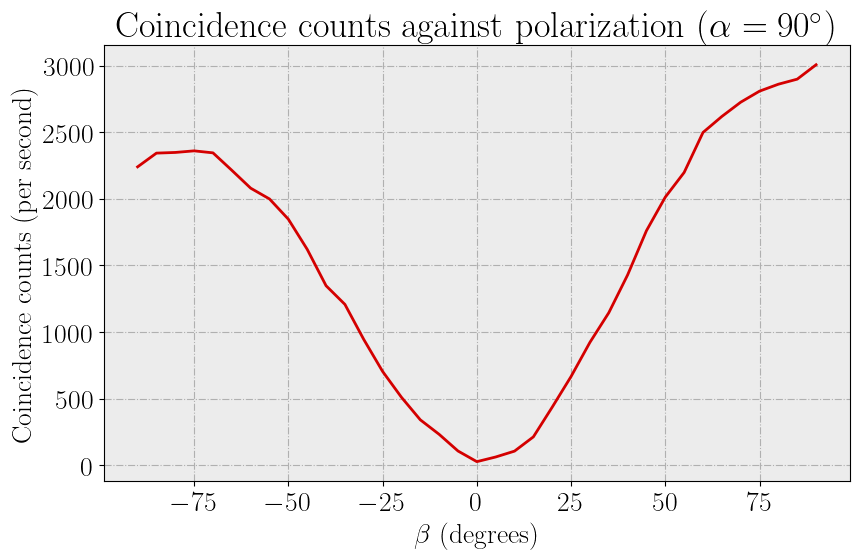

In [4]:
# Figure size
plt.figure(figsize = (9, 6))

# Figure title and legends
plt.title(r'Coincidence counts against polarization ($\alpha = 90^{\circ}$)')
plt.xlabel(r'$\beta$ (degrees)')
plt.ylabel(r'Coincidence counts (per second)')

# Plot
plt.plot(alpha, counts, color = '#D40000')

# Final figure parameters
plt.tight_layout()
plt.savefig('./figures/coincidence_fixed_no-hwp.pdf')

##### $\textit{2.2 Creating the Bell states}$
We inserted the HWP and measured the visibility in the $\text{HV}$ and $\text{DA}$ bases. For $\text{HV}$, we got the following data:

<center>

| State       | $\alpha$     | $\beta$      | Coincidence rate |
| :---------: | :----------: | :----------: | :--------------: |
| $\text{HH}$ | $90^{\circ}$ | $90^{\circ}$ | $1275$           |
| $\text{HV}$ | $90^{\circ}$ | $0^{\circ}$  | $34$             |
| $\text{HH}$ | $0^{\circ}$  | $90^{\circ}$ | $29$             |
| $\text{VV}$ | $0^{\circ}$  | $0^{\circ}$  | $1491$           |

</center>

For $\text{DA}$, we got the following results:

<center>

| State       | $\alpha$      | $\beta$       | Coincidence rate |
| :---------: | :-----------: | :-----------: | :--------------: |
| $\text{DD}$ | $45^{\circ}$  | $45^{\circ}$  | $1450$           |
| $\text{DA}$ | $45^{\circ}$  | $-45^{\circ}$ | $151$            |
| $\text{AD}$ | $-45^{\circ}$ | $45^{\circ}$  | $205$            |
| $\text{AA}$ | $-45^{\circ}$ | $-45^{\circ}$ | $1008$           |

</center>

In [9]:
# Coincidence rates in the HV basis
Chv_par_hwp = 1275 + 1491
Chv_per_hwp = 34 + 29

# Coincidence rates in the DA basis
Cda_par_hwp = 1450 + 1008
Cda_per_hwp = 151 + 205

# Visibilities
Vhv_hwp = (Chv_par_hwp - Chv_per_hwp) / (Chv_par_hwp + Chv_per_hwp)
Vda_hwp = (Cda_par_hwp - Cda_per_hwp) / (Cda_par_hwp + Cda_per_hwp)

# ===================================================================

# Delta C_{extrema} in the HV basis
Delta_Chv_par_hwp = math.sqrt(Chv_par_hwp)
Delta_Chv_per_hwp = math.sqrt(Chv_per_hwp)

# Delta C_{extrema} in the AD basis
Delta_Cda_par_hwp = math.sqrt(Cda_par_hwp)
Delta_Cda_per_hwp = math.sqrt(Cda_per_hwp)

# ===================================================================

# Partial derivatives in the HV basis
Partial_par_Chv_par_hwp = (2 * Chv_per_hwp) / (Chv_par_hwp + Chv_per_hwp) ** 2
Partial_per_Chv_par_hwp = -(2 * Chv_par_hwp) / (Chv_par_hwp + Chv_per_hwp) ** 2

# Partial derivatives in the DA basis
Partial_par_Cda_par_hwp = (2 * Cda_per_hwp) / (Cda_par_hwp + Cda_per_hwp) ** 2
Partial_per_Cda_par_hwp = -(2 * Cda_par_hwp) / (Cda_par_hwp + Cda_per_hwp) ** 2

# ===================================================================

# Visibility error
Vhv_hwp_error = math.sqrt((Partial_par_Chv_par_hwp * Delta_Chv_par_hwp) ** 2 + (Partial_per_Chv_par_hwp * Delta_Chv_per_hwp) ** 2)
Vda_hwp_error = math.sqrt((Partial_par_Cda_par_hwp * Delta_Cda_par_hwp) ** 2 + (Partial_per_Cda_par_hwp * Delta_Cda_per_hwp) ** 2)

# Printing the visibilites for each basis without HWP
print(f"C_parallel in HV basis = {Chv_par_hwp:.2f}")
print(f"C_perp in HV basis = {Chv_per_hwp:.2f}")
print(f"C_parallel in DA basis = {Cda_par_hwp:.2f}")
print(f"C_perp in DA basis = {Cda_per_hwp:.2f}")
print(f"Experimental visibility in the HV basis (without HWP) = {Vhv_hwp:.2f} ± {Vhv_hwp_error:.2f},")
print(f"Experimental visibility in the DA basis (without HWP) = {Vda_hwp:.2f} ± {Vda_hwp_error:.2f}.")

C_parallel in HV basis = 2766.00
C_perp in HV basis = 63.00
C_parallel in DA basis = 2458.00
C_perp in DA basis = 356.00
Experimental visibility in the HV basis (without HWP) = 0.96 ± 0.01,
Experimental visibility in the DA basis (without HWP) = 0.75 ± 0.01.
